# Project 1 - Quality control for a clock manufacturing company [40 marks]

---

Make sure you read the instructions in `README.md` before starting! In particular, make sure your code is well-commented, with sensible structure, and easy to read throughout your notebook.

---

There is an imaginary clock manufacturing company that wants you to develop software to check the quality of its products. The clocks produced by this company have **two hands**:

- the small hand is **red** and indicates the **hour**,
- the long hand is **green** and indicates the minutes.

We refer to these as *the hour hand* and *the minute hand* respectively. These clocks do not have any other hands (although some other clocks have a third hand indicating the seconds).

It is very important for these hands to be properly aligned. For example, if the hour hand is pointing to the hour `3` (being horizontal and pointing toward right), the minute hand should be pointing toward the hour `12` (vertical and pointing upward). Another example is when the hour hand is pointing to the hour `1:30` (making a 45 degree angle from the vertical line), the minute hand should be pointing toward hour `6` (vertical and downward).

| Correct `1:30`, the hour hand is halfway between 1 and 2. | Incorrect `1.30`, the hour hand is too close to 1. |
|:--:|:--:|
| ![Correct 1.30](graphics/one_thirty_correct.png) | ![Incorrect 1.30](graphics/one_thirty_incorrect.png) |

Due to production imprecisions, this is not the case all the time. Your software package will **quantify the potential misalignments** and help the company to return the faulty clocks back to the production line for re-adjustment.

You will achieve this goal in several steps during this project. Most steps can be done independently. Therefore, if you are struggling with one part, you can move on to other tasks and gain the marks allocated to them.

For most tasks, under "✅ *Testing:*", you will be given instructions on how to check that your function works as it should, even if you haven't done the previous task.


---

## Task 1: Reading images into NumPy arrays [3 marks]

The company takes a picture of each clock, and saves it as a PNG image of 101x101 pixels. The folder `clock_images` contains the photos of all the clocks you need to control today.

In a PNG colour image, the colour of each pixel can be represented by 3 numbers between 0 and 1, indicating respectively the amount of **red**, the amount of **green**, and the amount of **blue** needed to make this colour. This is why we refer to colour images as **RGB** images.

- If all 3 values are 0, the pixel is black.
- If all 3 values are 1, the pixel is white.
- If all 3 values are the same, the pixel is grey. The smaller the values, the darker it is.
- Different amounts of red, green, and blue correspond to different colours.

For example, select a few colours [using this tool](https://doc.instantreality.org/tools/color_calculator/), and check the RGB values for that colour in the *RGB Normalized decimal* box. You should see that, for instance, to make yellow, we need a high value of red, a high value of green, and a low value of blue.

If you'd like more information, [this page](https://web.stanford.edu/class/cs101/image-1-introduction.html) presents a good summary about RGB images.

---

🚩 Study the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) for the functions `imread()` and `imshow()` from `matplotlib.pyplot`. Then, write code below to read the `clock_0` image from `batch_0` into a NumPy array, and display the image.

You will obtain a NumPy array with shape `(101, 101, 3)`, i.e. an array which is 3 layers deep. Each of these layers is a 101x101 array, where the elements represent the intensity of red, green, and blue respectively, for each pixel. For example, the element of this array with index `[40, 20, 2]` corresponds to the amount of blue in the pixel located in row 40, column 20.

Create a second figure, with 3 sets of axes, and use `imshow()` to display each layer separately on its own set of axes. Label your figures appropriately to clearly indicate what each image is showing.

*Note: you can use `ax.imshow()` to display an image on the axes `ax`, the same way we use `ax.plot()`.*

In [11]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
from math import *
from scipy import stats


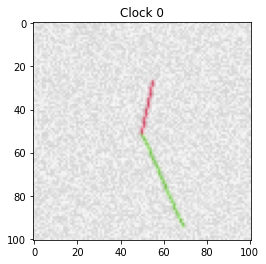

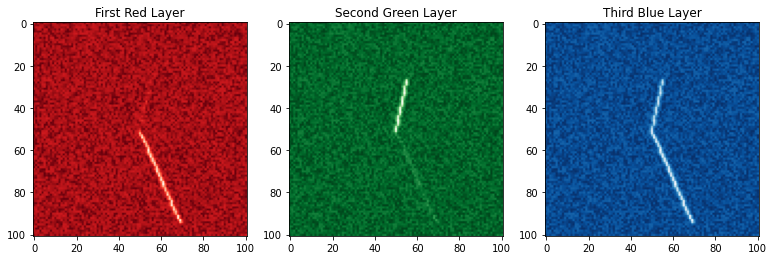

In [12]:

clock0 = plt.imread('clock_images/batch_0/clock_0.png')
plt.imshow(clock0)
plt.title('Clock 0')

# here we got a Numpy array with the shape (101, 101, 3) RGB pixels.


# creating the figure and axes
fig, ax = plt.subplots(1,3, figsize = (13,5))

# printing out the first layer of the image with the title
first_layer = clock0[:, :, 0]
ax[0].imshow(first_layer, cmap='Reds')
ax[0].title.set_text('First Red Layer')

# printing out the second layer of the image with the title
second_layer = clock0[:, :, 1]
ax[1].imshow(second_layer, cmap='Greens')
ax[1].title.set_text('Second Green Layer')

# printing out the third layer of the image with the title
third_layer = clock0[:, :, 2]
ax[2].imshow(third_layer, cmap='Blues')
ax[2].title.set_text('Third Blue Layer')

---
## Task 2: Clean up the images to extract data [6 marks]

Later in Task 3, we will use **linear regression** to find the exact position of both clock hands. To perform linear regression, we will need the **coordinates of the pixels** belonging to each hand; then, we will be able to fit a line through these pixels.

This task is concerned with extracting the correct pixel coordinates from the image.

---

🚩 Write a function `get_clock_hands(clock_RGB)`, which takes one input argument `clock_RGB`, a NumPy array of size 101x101x3 representing an RGB image of a clock, and returns 2 NumPy arrays with 2 columns each, such that:

- In the first array, each row corresponds to the `[row, column]` index of a pixel belonging to the **hour hand**.
- In the second array, each row corresponds to the `[row, column]` index of a pixel belonging the **minute hand**.

The goal is to obtain, for each hand, a collection of `[row, column]` coordinates which indicate where on the picture is the clock hand. You will need to figure out a way to decide whether a given pixel belongs to the hour hand, the minute hand, or neither.


---

***Important note:*** the pictures all contain some amount of noise and blur. Depending on how you decide to count a certain pixel or not as part of a clock hand, your function will pick up different pixels. There isn't just one possible set of pixel coordinates to pick up for a given image -- the most important thing is that the pixels you extract **only** belong to one of the two hands, and not to the background for example. This will ensure that you can use linear regression efficiently.

---

✅ *Testing:* For example, for the tiny 7x7 clock below (a 7x7 pixel image is available in the `testing` folder for you to try your function):

| Clock | Hour hand | Minute hand |
|:--:|:--:|:--:|
| <img src="graphics/task2.png" alt="Task 2 example" style="width: 100px;"/> | [[1, 1]<br/> [2, 2]] | [[3, 3]<br/> [4, 3]<br/> [4, 4]<br/> [5, 4]<br/> [6, 5]] |

In [13]:
# Define the function:
def get_clock_hands(clock_RGB):
    
    '''
    Get the coordinates of the clockhand
    
    Input:
        (Numpy array)
        The RGB image
        
    Output: 
        (Numpy array)
        There are two output, first one is the hourhand coordinates and second is the minutehand coordinates.
    '''
    
    
    
    '''
    Explanation of the magic number:
    
    Here we draw three histograms to see that how much Red, how much Green and how much Blue for each layer, and 
    to see what is the bounded value of them. From the histograms we can see thatthe most of Red values are lying 
    above 0.7, the most of the Green are lying above 0.7 and the most of the Blue are lying above 0.7, so we only
    want to collect the points which has a high Red values(>0.7), low Green(<0.7) values and low Blue(<0.7) values
    in R Layer, then we add the points into the hour_hand array. Then to collect coords for minute_hand, we want to
    collect the points which have lower Red value(<0.7), but higher Green value(>0.7) and lower Blue value(<0.7),
    then add them into the array of minute_hand.
    '''
    
    # Therefore, I  will assign the value of the colour to the string, which is bounded by 0.7:
    RGB_vBound = 0.7
    
    # I created two arrays to wait adding the coords later:
    hour_hand = []
    minute_hand = []

    # ** Explanation is shown above **:
    for i in range(np.shape(clock_RGB)[0]):
        for j in range(np.shape(clock_RGB)[1]):
            if ((clock_RGB[i, j, 0] > RGB_vBound) and (clock_RGB[i,j,1] < RGB_vBound) and (clock_RGB[i,j,2] < RGB_vBound)):
                hour_hand.append([i, j])
            elif ((clock_RGB[i, j, 0] <  RGB_vBound) and (clock_RGB[i,j,1] > RGB_vBound) and (clock_RGB[i,j,2] < RGB_vBound)):
                minute_hand.append([i, j])
    return hour_hand, minute_hand

# Testing:
clock = plt.imread('testing/task2_7x7.png')
get_clock_hands(clock)

# # I will give one example here to show how I got the above number!
# clock0 = plt.imread('testing/task2_7x7.png')
# data = np.asarray(clock0)

# fig, ax = plt.subplots(1, 3, figsize = (15,4))
# ax[0].hist(data[:, :, 0])
# ax[1].hist(data[:, :, 1])
# ax[2].hist(data[:, :, 2])






([[1, 1], [2, 2]], [[3, 3], [4, 3], [4, 4], [5, 4], [6, 5]])

---

## Task 3: Calculate the angle of the two hands [9 marks]

Now that we have pixel locations for each hand, we can estimate the **angle** between each hand and the 12 o'clock position. We will use this angle later to determine the time indicated by each hand. For instance, the figure below shows the angle made by the hour hand with the 12 o'clock position.

![Angle between hour hand and 12 o'clock](graphics/angle.png)

---

🚩 Write a function `get_angle(coords)` which takes one input argument, a NumPy array with 2 columns representing `[row, column]` pixel coordinates of one clock hand, exactly like one of the arrays returned by `get_clock_hands()` from Task 2.

- Your function should use these pixel coordinates to find a **line of best fit** using linear regression.
- Then, using this line of best fit, you should determine and **return** the angle between the clock hand and the 12 o'clock position, measured in **radians**.

The angle should take a value between $0$ (inclusive) and $2\pi$ (exclusive) radians, where $0\, \text{rad}$ corresponds to the 12 o'clock position.

---

***Notes:***

- When performing linear regression, you will need to pay particular attention to the case where the clock hand is vertical or almost vertical.
- Beware of the correspondance between `[row, column]` index and `(x, y)` coordinate for a given pixel.
- Note that the meeting point of the 2 clock hands may not be exactly at `[50, 50]`. Some of the pictures have a small offset.
- Partial attempts will receive partial marks. For instance, if you are struggling with using linear regression, or if you don't know how to account for possible offset of the centre, you may receive partial marks if you use a simpler (but perhaps less accurate) method.

---

✅ *Testing:* the files `task3_hourhand.txt` and `task3_minutehand.txt` are provided for you to test your function in the `testing` folder. Use `np.loadtxt()` to read them.

With these coordinates, you should find an angle of approximately 4.2 radians for the hour hand, and 5.7 radians for the minute hand.

In [14]:
# Define the function:
def get_angle(coords):
    
    '''
    Get the angle of the coordinates
    
    Input:
        (Numpy array)
        The coordinates of the hand.
        
    Output:
        (Float)
        The radient of the angle.
    
    --------------------------------------------------
    In this part, we should first change the coords that is the input of the function, then because the input will
    turn out as an array, so we want to keep the rows but swap the column of the coordinates because the coordinates 
    of the pixel will be shown as opposite way of the Cartesian coordinates. The following codes shown the way 
    of doing it. Then we separate the x and y coordinates in order to make the best fitline and get the gradient of
    the fitline for later use of calculating the angle. 
    '''
    
    # We want to swap the rows and columns, because we are changing the row-column to x-y axis:
    coords = np.array(coords)
    coords[:, [0,1]] = coords[:, [1,0]]
    coords[:, 1] = -1 * coords[:, 1]
    
    # We collect all x-y coordinates, and define each of them:
    x=coords[:, 0]
    y=coords[:, 1]
    
    '''
    Then we define the best fitline and also the gradient of the fitline.
    
    Here, since there is a problem that the gradient will be infinity when the angle is 0 or pi/2, so we want to fix
    this error. I have found few lines to solve this problem, the citation is shown below.
    
    The meaning of the codes is that we 'try' to calculate the gradient first if it is shown a floating infinite number, 
    then the code will go to the except condition to define the gradient to be infinite or negative infinite. Because for 
    example, the computer can only know arctan(infinite) instead of arctan(0.637783483636374...). Then if the gradient is 
    infinite then we return the angle. 
    '''
    
    # line X-Y: HYRY
    # URL: https://stackoverflow.com/questions/21252541/how-to-handle-an-np-rankwarning-in-numpy
    # Accessed on 6th Nov 2021.

    with warnings.catch_warnings():
        warnings.filterwarnings('error')
        try:
            fit = np.polyfit(x, y, 1)
            ang_coeff = fit[0]
        except np.RankWarning:
            if ((y>-50).sum())/len(y) >0.5:
                ang_coeff = np.inf
            else:
                ang_coeff = -np.inf
            angle = np.pi/2-np.arctan(ang_coeff)
            return angle
    
    '''
    Since by checking with all the clock_images, I found there is a clock image which hourhand is pointing the 12,
    but it's x coordinates are not all on the vertical line, so the computer passed the first condition 'try', but
    the right one is it passes the 'except' condition and calculate the angle by using infinite gradient.
    
    Therefore, I used 'if' condition here to assume that if the most of the x coordinates are the same, then the 
    gradient will be infinite.
    '''
    if (x == stats.mode(x)).sum() / len(x) > 0.75:
        ang_coeff = np.inf
        angle = np.pi/2 - np.arctan(ang_coeff)
        return angle

    # Set default angle:
    angle = np.pi/2  - np.arctan(ang_coeff)
    
    # Getting the correct angle:
    if angle <= 15*np.pi/180:
        if ((y > -50).sum())/len(y) > 0.5:
            return angle
        else:
            return angle + np.pi
    elif angle > 165*np.pi/180:
        if ((y > -50).sum())/len(y) <= 0.5:
            return angle
        else:
            return angle + np.pi
    else:
        
        if ((x < 50).sum())/len(x) > 0.5:
            return angle + np.pi
        else:
            return angle

# Testing:
hour_coords_ = np.loadtxt('testing/task3_hourhand.txt')
minute_coords_ = np.loadtxt('testing/task3_minutehand.txt')

print(get_angle(hour_coords_))
print(get_angle(minute_coords_))
    

4.184560322785384
5.646141363468294


---

## Task 4: Visualising the clock [6 marks]

🚩  Use `matplotlib` and your artistic skills to visualise the clock. Write a function `draw_clock(angle_hour, angle_minute)` that takes 2 input arguments, corresponding to the two angles of the clock hands, and draw a clock with the precise location of both hands.

Your plot may include the number associated to hours, a background like a circle, an arrow head for each hand etc.

---

✅ *Testing:* with `angle_hour` set to $\frac{\pi}{3}$ and `angle_minute` set to $\frac{11\pi}{6}$, the hour hand should point exactly at 2, and the minute hand should point exactly at 11.

There is also an example image in the `testing` folder, which was produced entirely with `matplotlib`. This is just to give you an idea of what is possible to do -- you shouldn't attempt to reproduce this particular example, don't hesitate to get creative!

In [ ]:
# Define the function:
def draw_clock(angle_hour, angle_minute):
    
    '''
    Get a clock face which shows the correct time
    
    Input:
        (Float)
        The radient angle of the clock hands
        
    Output:
        Show the clock that we created
    '''
    
    # create figure which we will draw our clock on:
    fig =  plt.figure()

    # Creating x and y coordinates in the range from -6 to 6 with 100 points each:
    x1 = np.linspace(-6.5, 6.5, 100)
    y1 = np.linspace(-6.5, 6.5, 100)
    
    # Create a 2-D grid:
    x1,y1 = np.meshgrid(x1,y1)
    
    # Define the function of circle:
    z1 = x1**2 + y1**2
    
    # Draw the line of circle:
    plt.contour(x1,y1,z1,[36], colors='black')
    
    # Scale the plot equally:
    plt.axis('equal')
    
    # Not showing the axis:
    plt.axis(False)

    # Creating the marks of hours by using the for loop:
    
    '''
    Here we creating the marks by drawing the mark line one by one by using the for loop. Since there are 12 hours in
    one day and 60 mins in each hour, we define the radient to be pi/6 among hour marks and pi/30 among minute marks.
    And the length of the lines we are drawing is between 4 to 4.5 in each x and y for hour marks and 4.2 to 4.5 in each
    x and y for minute marks. 'for' loop can help us to create them directly, see the codes below.
    
    Warning: since the minute marks will be created on each pi/30 radient, thus, there will be some overlap with hour
    maarks. To solve this problem, we use 'if' condition to say we don't draw the minute marks on each fifth minute.
    See the codes representing below.
    '''
    # Draw the hour marks:   
    for i in range(12):
        plt.plot([4*cos(np.pi/6 *i), 4.5*cos(np.pi/6 *i)],[4*sin(np.pi/6 *i), 4.5*sin(np.pi/6 *i)],linestyle='-', color='black')
    
    # Draw the minute marks:
    for i in range(60):
        
        # Not ploting each fifth minute. 
        if i%5 != 0:
            plt.plot([4.2*cos(np.pi/30 *i), 4.5*cos(np.pi/30 *i)],[4.2*sin(np.pi/30 *i), 4.5*sin(np.pi/30 *i)],linestyle='-',color='red')

    '''
    By using the same way as before, we want to write some hour numbers using 'for' loop. Since the range will display
    0 at 12 clock position, we use 'if' to set the 0 to be 12. Number 5.2 in the loop below is shown the distance(radius)
    of the number from the center of the clock.
    '''
    # Show the number on the clock:
    for i in range(12):
        if i==0:
            plt.text(5.2*np.sin(np.pi/6*i), 5.2*np.cos(np.pi/6*i),f'{12}', ha = 'center', va = 'center', fontsize = 18, fontfamily = 'monospace')
        else:
            plt.text(5.2*np.sin(np.pi/6*i), 5.2*np.cos(np.pi/6*i),f'{i}', ha = 'center', va = 'center', fontsize = 18, fontfamily = 'monospace')
    
    '''
    The way of drawing the hands is the same as draw the marks, but here we start from the center of the 
    clock(0 basically). And the hourhand is longer than the minutehand(4.5 for the minutehand, 2.5 for the hourhand).
    '''
    # Drawing the minute and hour hands here:
    minutehand1 = plt.plot([0, 4.5*cos(np.pi/2-angle_minute)],[0, 4.5*sin(np.pi/2-angle_minute)], color='black')
    hourhand1 = plt.plot([0, 2.5*cos(np.pi/2-angle_hour)],[0, 2.5*sin(np.pi/2-angle_hour)], color='red')

    plt.show()
    
# Testing:
draw_clock(3.5405, 4.907)


---
## Task 5: Analog to digital conversion [5 marks]

🚩 Write a function `analog_to_digital(angle_hour, angle_minute)` that takes two input arguments, corresponding to the angles formed by each hand with 12 o'clock, and returns the time in digital format. More specifically, the output is a string showing the time in hour and minute in the format `hh:mm`, where `hh` is the hour and `mm` is the minute.

- When the hour is smaller than 10, add a leading zero (e.g. `04:30`).
- When the hour is zero, display `12`.

At this point, your function is not concerned about the imprecision. It should calculate the hour from the hour hand, and the minute from the minute hand, separately.

---
✅ *Testing:* the same angles as in Task 4 should give you `02:55`.

In [ ]:
# Define the function:
def analog_to_digital(angle_hour, angle_minute):
    
    '''
    Get the digital style of the clock time
    
    Input:
        (Float)
        The radient angles of two clocks hands.
        
    Output:
        The digital style of the time
    
    ---------------------------------------------------------------
    
    Here we define the hours and minutes. Firstly, we should calculate the hour by using the angle we got, which is
    angle_hour/(pi/6). The reason that we calculate the hour like this is because, pi/6 represent one hour, and we want
    to know how many one hours the angle_hour has, this will turn out as the hour related to the angle_hour.
    
    Since the hour we calculated will lie in the float range, and the hour between each hour mark is the hour of the 
    previous mark, e.g. 1.5 hours is 1 hour and 30 mins, and we only collect 1 hour in this case.
    Similar to the minute, the only difference is the scale of hour(12) and minute(60).
    
    One problem here is, the hours we get below is a float number, e.g. 1 hour will be 1.0 hour. This is not allowed
    in the final digital clock, so I will change them to be integer, codes are shown below.
    '''

    # Define hours and minutes:
    hours = np.floor(angle_hour/(np.pi/6))
    minutes = np.floor(angle_minute/(np.pi/30))
    
    # Change the float number to be the integer:
    hours_int = int(hours)
    minutes_int = int(minutes)
    

    # When the hour is zero, display 12:
    if hours_int == 0:
        hours_int = 12
        
    '''
    Following the requirement, we should add leading 0 to the number which is smaller than 10, so we will use 'if'
    condition to achieve this. See the codes below.
    '''
    
    if hours_int < 10 and minutes_int < 10:
        clock_txt = f'0{hours_int}:0{minutes_int}'
    elif hours_int < 10 and minutes_int >= 10:
        clock_txt = f'0{hours_int}:{minutes_int}'
    elif hours_int >= 10 and minutes_int >= 10:
        clock_txt = f'{hours_int}:{minutes_int}'
    elif hours_int >= 10 and minutes_int <= 10:
        clock_txt = f'{hours_int}:0{minutes_int}'
    return clock_txt

# Testing:
analog_to_digital(np.pi/3, 11*np.pi/6) 

    

---
## Task 6: Find the misalignment [5 marks]

Now that you have extracted useful information from the pictures, you need to check if the two hands are aligned properly. To do so, you will need to find the exact time that the **small hand** is showing, in hours and minutes. Then, compare with the minutes that the big hand is showing, and report the difference.

Note that the misalignment will never be more than 30 minutes. For example, if you read a 45-minute difference between the minutes indicated by the hour hand and by the minute hand, you can realign the minute hand by 15 minutes in the other direction instead.

---

🚩 Write a function `check_alignment(angle_hour, angle_minute)` which returns the misalignment in minutes.

Make sure you structure you code sensibly. You may wish to use some intermediate functions to do the sub-tasks.

---
✅ *Testing:* the same angles as in Task 4 should give you a 5-minute misalignment.

In [ ]:
# Define the function:
def check_alignment(angle_hour, angle_minute):
    
    '''
    Get the difference between the minute that converted by hourhand and minute that converted by minutehand.
    
    Input:
        (Float)
        Two redient angles of the clock hands
    
    Output:
        (Int)
        The alignment of the minutes.
    
    ---------------------------------------------------------------
    
    Firstly, we convert the hours to minutes, but only the minute part leading to see how much difference between the 
    minute that hourhand shows and the minute that minutehand shows. So we only get the decimal part of the hour 
    and time 60 to it. The difference will be calculated as HoursToMinute - Minutes(see the codes below), also, we 
    should convert the negative part to be positive(In this case, I think to use negative number is good to see which
    hand is running fast than another, but there is a coondition that the misalignment will never be more than 30 mins
    , so we need to convert it to positive to make the calculation easier).
    '''
    
    # Converting and calculate the difference:
    HoursToMinute = (angle_hour/(np.pi/6) - np.floor(angle_hour/(np.pi/6)))*60
    Minutes = np.floor(angle_minute/(np.pi/30))
    Difference = int(np.abs(HoursToMinute - Minutes))
    
    '''
    Following the requirement above, we should create a 'if' condition to let the difference no more than 30 mins.
    '''
    if Difference > 30:
        return 60-Difference
    
    else:
        return Difference
    
# Testing:
check_alignment(np.pi/3, 11*np.pi/6)
    

---
## Task 7: Putting it all together [6 marks]

Now that you have successfully broken down the problem into a sequence of sub-tasks, you need to combine all the above steps in one function.

🚩 Write a function `validate_clock(filename)` that takes the name of an image file (a picture of a clock face) as an input argument, and returns the misalignment in minutes as an integer.

Then, write a function `validate_batch(path, tolerance)` which takes 2 input arguments: `path`, a string to indicate the path of a folder containing a batch of clock pictures, and `tolerance`, a positive integer representing the maximum tolerable number of minutes of misalignment for a clock to pass the quality control check.

Your `validate_batch()` function should write a .txt file called `batch_X_QC.txt` (where `X` should be replaced by the batch number), containing the following information:

```
Batch number: [X]
Checked on [date and time]

Total number of clocks: [X]
Number of clocks passing quality control ([X]-minute tolerance): [X]
Batch quality: [X]%

Clocks to send back for readjustment:
clock_[X]   [X]min
clock_[X]   [X]min
clock_[X]   [X]min
[etc.]
```

The square brackets indicate information which you need to fill in.

- You will need to check all pictures in the given folder. You may wish to use Python's `os` module.
- The date and time should be the exact date and time at which you performed the validation, in the format `YYYY-MM-DD, hh:mm:ss`. You may wish to use Python's `datetime` module.
- The batch quality is the percentage of clocks which passed the quality control in the batch, rounded to 1 decimal place. For example, in a batch of 20 clocks, if 15 passed the control and 5 failed, the batch quality is `75.0%`.
- List all clock numbers which should be sent back for realignment, in **decreasing order of misalignment**. That is, the most misaligned clock should appear first.
- The list of clocks to send back and the misalignment in minutes should be vertically aligned, in a way which makes the report easy to read. Check the example in the `testing` folder.
- Your function should not return anything, simply write the .txt report.

For instance, to use your function to check batch 1 with a 2-minute maximum acceptable misalignment, the command will be `validate_batch('clock_images/batch_1', 2)`.

---

✅ *Testing:* There is an example report in the `testing` folder (for a batch which you do not have), to check that your report is formatted correctly.

---

🚩 Use your function `validate_batch()` to generate quality control reports for the 5 batches of clocks provided in the `clock_images` folder, with a tolerance of 3 minutes.

Your reports should all be saved in a folder called `QC_reports`, which you should create using Python. You should generate all 5 reports and include them in your submission.



In [ ]:
# Define the validate_clock(filename):
def validate_clock(filename):
    
    '''
    Get the misalignment in minutes as an integer.
    
    Input:
        (String)
        The name of the file
    
    Output:
        (Int)
        The misalignment in minutes as an integer.
    '''
    
    # Input the filename:
    clock = plt.imread(filename)
    
    # Get hour coordinates:
    hourco = get_clock_hands(clock)[0]
    
    # Get minute coordinates:
    minuteco = get_clock_hands(clock)[1]
    
    # Get angle of the hourhand:
    angle_hour = get_angle(hourco)
    
    # Get angle of the minutehand:
    angle_minute = get_angle(minuteco)
    
    # Return the alignment:
    return check_alignment(angle_hour, angle_minute)


# Define the validate_batch(path, tolerance) function:
def validate_batch(path, tolerance):
    
    '''
    Create a folder which contains the bathes. In each batch, we wrote the required information.
    
    Input:
        (String, Int)
        The path of the folder and the tolerance number.
    '''
    
    # Create an array that represents the clocks that do not pass the quality control, the element will be added later:
    NotPass = []
    
    # Set the number of clocks to be 0 at the begining:
    clock_count = 0
    
    # Set up the time that we checked the folder:
    time = datetime.datetime.now().strftime('%Y-%m-%d, %H:%M:%S')
    
    # The last element in the pass string is the number of the batch folder:
    batch_number = path[-1]
    
    '''
    We use 'for' loop here to create
    '''
    
    # Here we want to collect all the not passed clocks:
    for images in sorted(os.listdir(path)):
        
        # Add 1 to the clock number if the 'for' loop runs once:
        clock_count += 1
        
        # Create a filename which use the path that we input and add the image name to the end of the path:
        filename = path +  f'/{images}'
        
        # Get the time difference and set the tolerance, then add the name of the not passed one into the NotPass list:
        TimeDifference = validate_clock(filename)
        if TimeDifference > tolerance:
            NotPass.append([images[:-4], TimeDifference])
    
    # Get the number of the the passed clock:
    pass_clock = clock_count - len(NotPass)
    
    # Get the percentage of the passed clock:
    batch_q = 100 * pass_clock / clock_count
    
    # Sort the Notpassed clock:
    NotPass.sort(key=lambda x:x[1], reverse = True)
    
    # Create a folder and add the clock information into it:
    with open(f'QC_reports/batch_{batch_number}_QC.txt', 'w') as QC_file:
        QC_file.write(f'Batch Number: {batch_number}\n')
        QC_file.write(f'Checked on {time}\n\n')
        QC_file.write(f'Total number of clocks {clock_count}\n')
        QC_file.write(f'Number of clocks passing quality control ({tolerance}-minute tolerance): {pass_clock}\n')
        QC_file.write(f'Batch quality: {batch_q}%\n\n')
        QC_file.write('Clocks to send back for readjustment:\n')
        for i in NotPass:
            QC_file.write(f'{i[0]:10} {i[1]}min\n')


path = 'clock_images'

# Create only the QC_reports if it is not existed in the folder:
if not os.path.exists('QC_reports'):
    os.makedirs('QC_reports')

# In Macbook, there is always a '.DS_Store' automatically created in the folder, so we want to delete it if it is in the folder:
if os.path.exists('clock_images/.DS_Store'):
    os.remove('clock_images/.DS_Store')

# In each batch in the clock_images folder, we run the above function validate_batch(batch_path, 3), and add the required information into the file:
for batch in sorted(os.listdir(path)):
    batch_path = path + f'/{batch}'
    validate_batch(batch_path, 3)
    
